# Day13內容為將Day10~Day12做統整復習

# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定【data的資料夾路徑】，命名為【data_folder】
data_folder = 'C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data'

# 設定t001為某個data路徑
# 設定t002為pd裡read data的功能
# 註釋一下路徑位置，%s參數(和%d)的使用方法與限制，參考learning。
t001 = os.path.join(data_folder, 'application_train.csv')
t002 = pd.read_csv(t001)
print('Path of read in data: %s' %t001)
print(t002.shape)
t002.head()

Path of read in data: C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data\application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for d in t002:
    if t002[d].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(t002[d].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            # Day9開始真的有換老師，上面這種解釋Day8之前是完全不寫的。
            t002[d] = le.fit_transform(t002[d])            
print(t002.shape)
t002.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
t002['DAYS_EMPLOYED_ANOM'] = t002['DAYS_EMPLOYED'] == 365243
t002['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 處理後，再看一次~
t002['DAYS_EMPLOYED'].value_counts().head()
# 很好，【365243】不見了。

-200.0    156
-224.0    152
-230.0    151
-199.0    151
-212.0    150
Name: DAYS_EMPLOYED, dtype: int64

In [5]:
t002['DAYS_BIRTH'] = abs(t002['DAYS_BIRTH'])
t002['DAYS_BIRTH'].value_counts().head()

13749    43
13481    42
10020    41
18248    41
15771    40
Name: DAYS_BIRTH, dtype: int64

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### 連續型特徵離散化
雖然由之前的分析發現 `DAYS_BIRTH` 與 `TARGET` 的相關係數只有 -0.07，但直覺上這個變數應該會提供模型不少訊息

### 直覺？
上面這段答案的教材註解是非常不OK的，我們不就是要透過各種數據，去找出值得分析的交叉欄位？  
但課程答案卻教我：沒關係，縱使相關係數只有0.07很小，但以你大腦的直覺知道這兩個欄位還是值得分析的唷~~  
這說法明顯很不合理嘛...  
  
經詢問，回覆所謂【直覺】指的是【常識理解】。  
  
我是覺得啦...既然已經教了相關係數，那我們應該去找一些相關係數高的例子，來當作教材的答案，  
整個課程的前後銜接性也會比較高，不然學相關係數要做什麼呢？  
學了之後，後面卻也沒拿來當作交叉分析的參考，交叉分析的參考，仍然依據我們對於資料的【常識理解】，那講相關係數做什麼呢？  

經詢問後也有再次回覆，那我會認為，這邊這個說明，應該改成如下較佳：  
雖然由之前的分析發現 `DAYS_BIRTH` 與 `TARGET` 的相關係數只有 -0.07，  
但在往後的課程裡，為了實際解決問題，我們將透過一些處理方法，改善相關係數。  
目前我們先以對資料的【常識理解】，去觀察這兩個欄位的交叉狀況。  

In [6]:
# 資料整理 ('DAYS_BIRTH'全部取絕對值 )
t002['DAYS_BIRTH'] = abs(t002['DAYS_BIRTH'])
t003 = t002.sort_index(by='DAYS_BIRTH',ascending=False)
print('head\n', t003['DAYS_BIRTH'].head(5))
print('tail\n', t003['DAYS_BIRTH'].tail(5))

C:\Users\Ynitsed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


head
 265026    25229
124430    25201
63316     25201
143266    25200
169562    25197
Name: DAYS_BIRTH, dtype: int64
tail
 137182    7678
170384    7676
53702     7676
168135    7673
235444    7489
Name: DAYS_BIRTH, dtype: int64


In [7]:
# select欄位的概念，兩個[[]]
t004 = t002[['TARGET', 'DAYS_BIRTH']] #subset
t004.head(15)

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
5,0,16941
6,0,13778
7,0,18850
8,0,20099
9,0,14469


In [8]:
t004['YEARS_BIRTH_YEAR'] = t004['DAYS_BIRTH'] / 365
t004.head(15)

C:\Users\Ynitsed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
5,0,16941,46.413699
6,0,13778,37.747945
7,0,18850,51.643836
8,0,20099,55.065753
9,0,14469,39.641096


In [9]:
# 先來看看 'DAYS_BIRTH' 的統計描述吧 (pandas.describe())
print("Correlation between TARGET and DAYS_BIRTH", t004['DAYS_BIRTH'].corr(t004['TARGET']))
(t004['YEARS_BIRTH_YEAR']).describe()

Correlation between TARGET and DAYS_BIRTH -0.07823930830982712


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH_YEAR, dtype: float64

In [10]:
# 自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(20, 70, num = 11) 
"""
 1. 20(不含)~25(含)
 2. 25(不含)~30(含)
...
 9. 60(不含)~65(含)
10. 65(不含)~70(含)
"""

# 創建新欄位【YEARS_BINNED】
t004['YEARS_BINNED'] = pd.cut(t004['YEARS_BIRTH_YEAR'], bins = bin_cut) 

# 顯示不同組的數量
print(t004['YEARS_BINNED'].value_counts())

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


C:\Users\Ynitsed\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [11]:
t005  = t004.groupby('YEARS_BINNED').mean()
t005

,TARGET,DAYS_BIRTH,YEARS_BIRTH_YEAR
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


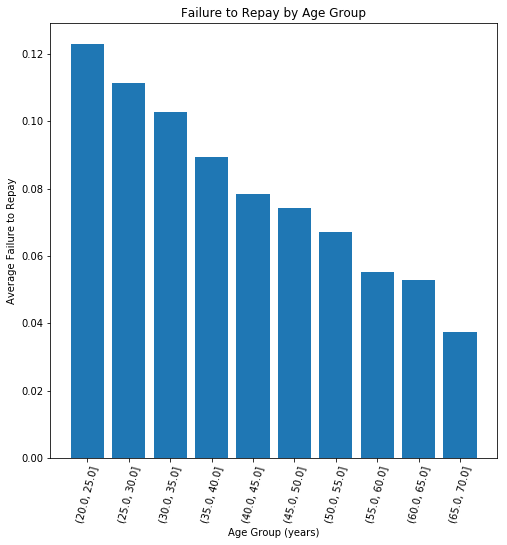

In [12]:
# 圖片大小，要先寫
plt.figure(figsize = (8,8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(t005.index)), t005['TARGET'])

# 設定x軸
plt.xticks(range(len(t005.index)), t005.index, rotation = 75)

# 加上 X, y 座標說明, 以及圖表的標題
plt.xlabel('Age Group (years)')
plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

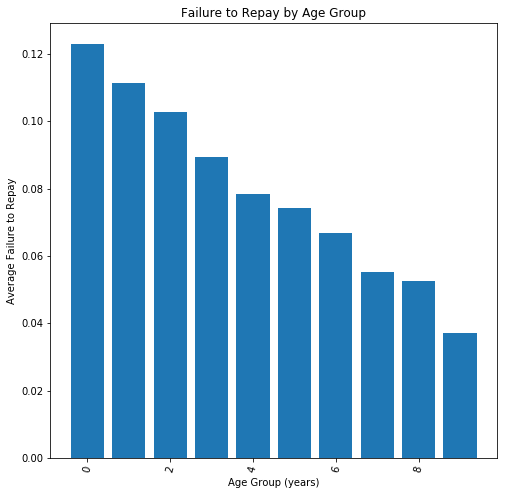

In [13]:
# 圖片大小，要先寫
plt.figure(figsize = (8,8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(t005.index)), t005['TARGET'])

# 設定x軸
# 嘗試一下，不加【range(len(t005.index)), t005.index】會怎樣？
plt.xticks( rotation = 75)
# 看來是指定【0~9, 0~9分別對應的內容】，沒寫的話，就直接是0~9。
# 這邊的【0~9】，是前一步【plt.bar】的x軸就已經給定的，沒寫就當作拿給定的x軸來用。

# 加上 X, y 座標說明, 以及圖表的標題
plt.xlabel('Age Group (years)')
plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

### Day13教材方向和目標
1. Day10~Day12的統整複習
2. plt.bar、plt.xticks

### Day13忽略部分
1. plt.xticks的各種參數
 
### Day13其他補充
murmur都在上面寫完了。
Day1~Day13可當作一個part。